In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("Dataset 3.csv")

In [7]:
data.head()

,Temperature,Humidity,pH,Rainfall,Label
0,20.879744,82.002744,6.502985,202.935536,Rice
1,21.770462,80.319644,7.038096,226.655537,Rice
2,23.004459,82.320763,7.840207,263.964248,Rice
3,26.491096,80.158363,6.980401,242.864034,Rice
4,20.130175,81.604873,7.628473,262.717340,Rice


In [8]:
data.tail()

,Temperature,Humidity,pH,Rainfall,Label
6995,19.194357,35.963156,6.425478,762.042570,Mustard
6996,23.493703,31.379660,6.134113,765.190596,Mustard
6997,18.190361,42.783204,6.872391,904.892120,Mustard
6998,23.148364,41.001895,6.185536,731.770490,Mustard
6999,24.180054,42.368177,6.473565,906.173454,Mustard


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  7000 non-null   float64
 1   Humidity     7000 non-null   float64
 2   pH           7000 non-null   float64
 3   Rainfall     7000 non-null   float64
 4   Label        7000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 273.6+ KB


In [10]:
data.shape

(7000, 5)

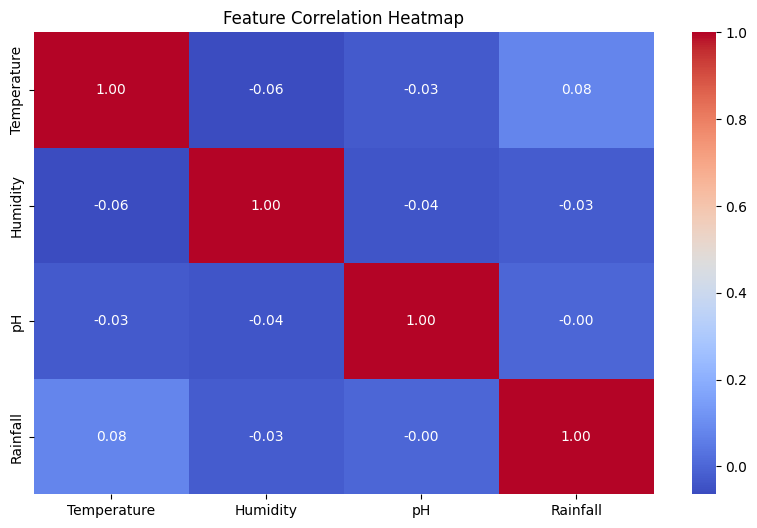

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
data['Label'].unique()

array(['Rice', 'Maize', 'Banana', 'Jute', 'Pulses', 'Mango', 'Papaya',
       'Tea', 'Aleovera', 'Arecanut', 'Ashwagandha', 'Rose', 'Blackgram',
       'Chickpea', 'Coconut', 'Coffee', 'Cotton', 'Grapes', 'Kidneybeans',
       'Mothbeans', 'Mungbeans', 'Muskmelon', 'Orange', 'Piegonpeas',
       'Pomegranate', 'Watermelon', 'Apple', 'Cabbage', 'Cauliflower',
       'Green Chillies', 'Carrot', 'Ginger', 'Garlic', 'Onion', 'Brinjal',
       'Button Mushrooms', 'Potato', 'Capsicum', 'Tomato',
       "Lady's Finger", 'DragonFruit', 'Olive', 'Marigold', 'Beetroot',
       'Lettuce', 'Corn', 'Green Peas', 'Cucumber', 'Guava', 'Turmeric',
       'Rajma', 'Pumpkin', 'Litchi', 'Broccoli', 'Spinach', 'Groundnut',
       'Jackfruit', 'Radish', 'Chinese Cabbage', 'Drumstick', 'Soybean',
       'Sweet Potato', 'Poppy Seeds', 'Coriander', 'Walnuts',
       'Cashewnuts', 'French Beans', 'Sugarcane', 'Bajra', 'Mustard'],
      dtype=object)

In [14]:
data['Label'].value_counts()

Label
Rice            100
Maize           100
Banana          100
Jute            100
Pulses          100
               ... 
Cashewnuts      100
French Beans    100
Sugarcane       100
Bajra           100
Mustard         100
Name: count, Length: 70, dtype: int64

🎯 Model Accuracy: 96.14%
❌ Error Rate: 3.86%

📊 Classification Report:
                   precision    recall  f1-score   support

        Aleovera       0.92      1.00      0.96        12
           Apple       0.86      0.95      0.90        20
        Arecanut       1.00      1.00      1.00        15
     Ashwagandha       1.00      1.00      1.00        25
           Bajra       1.00      1.00      1.00        21
          Banana       1.00      1.00      1.00        22
        Beetroot       1.00      1.00      1.00        29
       Blackgram       0.88      1.00      0.94        15
         Brinjal       0.94      0.89      0.92        19
        Broccoli       0.90      1.00      0.95        18
Button Mushrooms       0.74      0.67      0.70        21
         Cabbage       0.94      1.00      0.97        15
        Capsicum       0.83      1.00      0.90        19
          Carrot       1.00      1.00      1.00        20
      Cashewnuts       1.00      0.83      0.90        23

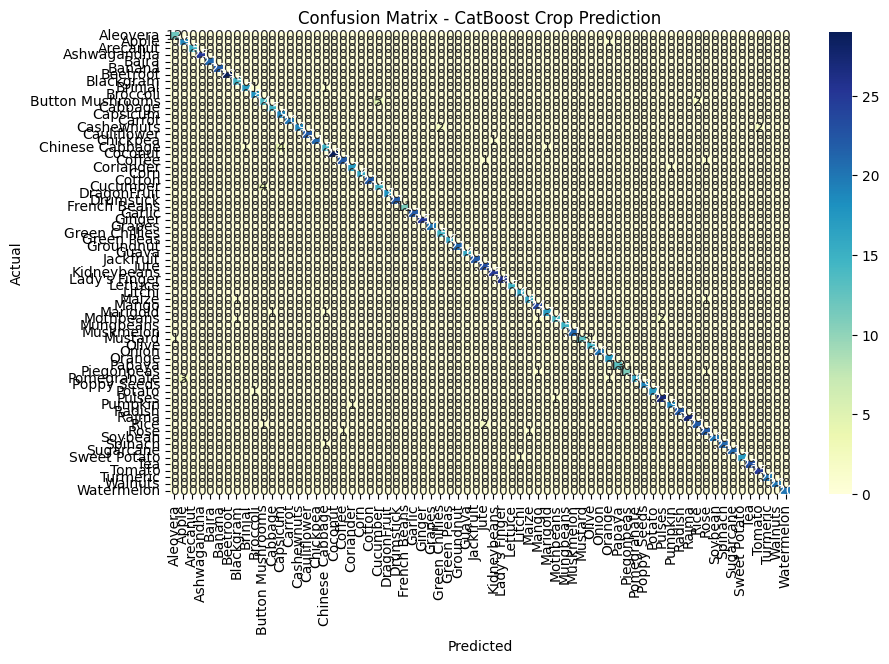

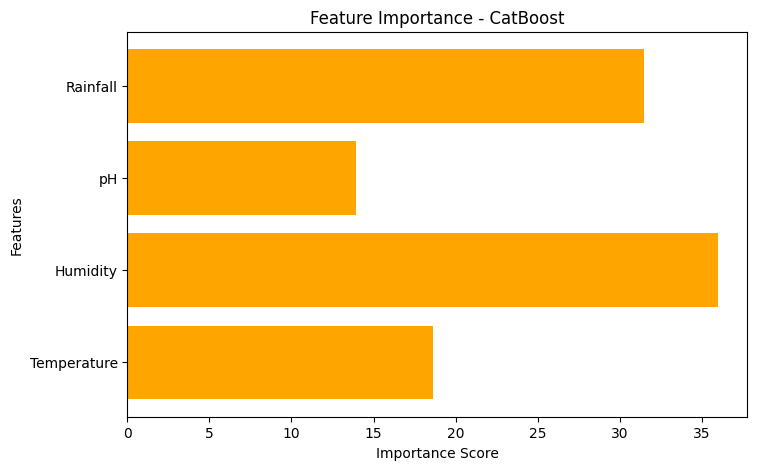

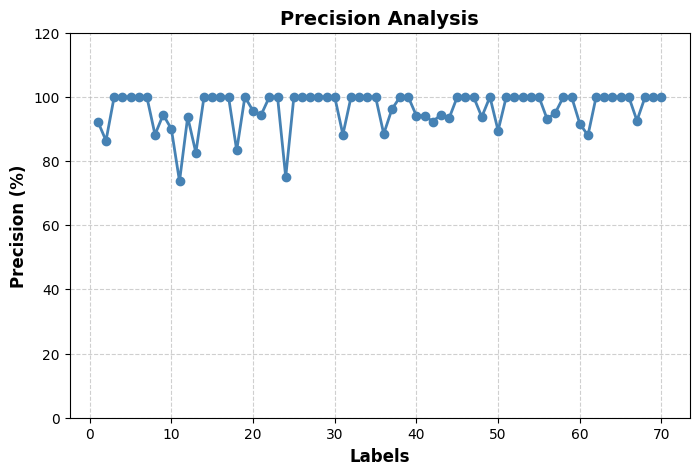

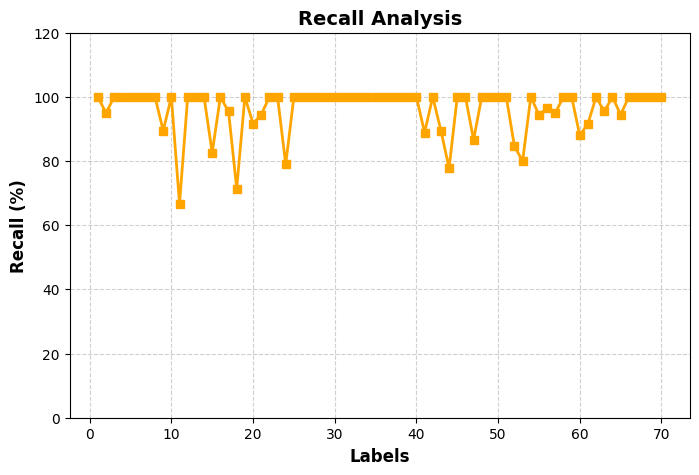

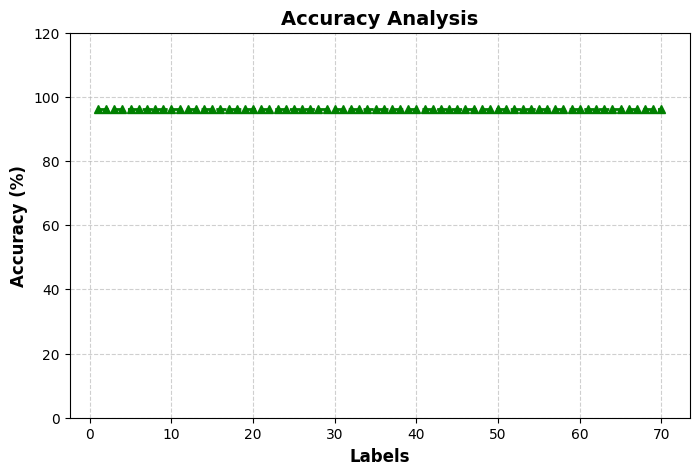

✅ Overall Accuracy of Model: 96.14%

--- 🌿 Enter Soil and Climate Details ---


Enter Temperature:  230
Enter Humidity:  80
Enter pH:  6
Enter Rainfall:  230



✅ Recommended Crop: Rice


C:\Users\yogesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset
data = pd.read_csv("Dataset 3.csv")

# 2️⃣ Separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 3️⃣ Encode target labels (crop names)
le = LabelEncoder()
y = le.fit_transform(y)

# 4️⃣ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Initialize and train CatBoost model
model = CatBoostClassifier(
    iterations=300,        # number of trees
    learning_rate=0.1,     # step size
    depth=6,               # tree depth
    loss_function='MultiClass',
    verbose=False,         # hide training logs
    random_state=42
)
model.fit(X_train, y_train)

# 6️⃣ Predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"🎯 Model Accuracy: {accuracy*100:.2f}%")
print(f"❌ Error Rate: {error_rate*100:.2f}%\n")
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 8️⃣ Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - CatBoost Crop Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9️⃣ Feature Importance Plot
feature_importance = model.get_feature_importance(Pool(X_train, y_train))
plt.figure(figsize=(8,5))
plt.barh(X.columns, feature_importance, color='orange')
plt.title("Feature Importance - CatBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()




#  Get classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
labels = range(1, len(le.classes_) + 1)

# Extract per-class metrics
precision = [report[str(i)]['precision'] * 100 for i in range(len(le.classes_))]
recall = [report[str(i)]['recall'] * 100 for i in range(len(le.classes_))]
accuracy_value = accuracy_score(y_test, y_pred) * 100
accuracy = [accuracy_value] * len(le.classes_)

# Get crop names for x-axis
crop_names = le.classes_

#  Plot Precision Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, precision, marker='o', color='steelblue', linewidth=2)
plt.title("Precision Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Precision (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# Plot Recall Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, recall, marker='s', color='orange', linewidth=2)
plt.title("Recall Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Recall (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#   Plot Accuracy Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracy, linestyle='--', color='green', linewidth=2, marker='^')
plt.title("Accuracy Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ Overall Accuracy of Model: {accuracy_value:.2f}%")

# 🔟 🌱 User Input Prediction
print("\n--- 🌿 Enter Soil and Climate Details ---")
user_input = []
for col in X.columns:
    value = float(input(f"Enter {col}: "))
    user_input.append(value)

# Convert to DataFrame
user_df = pd.DataFrame([user_input], columns=X.columns)

# Predict crop
predicted_crop = le.inverse_transform(model.predict(user_df).astype(int))[0]
print("\n✅ Recommended Crop:", predicted_crop)
